In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib


In [26]:
covid = pd.read_csv('covid19_italy_region.csv',parse_dates=['Date'],index_col='Date')
covid.head()

,SNo,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Date,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,0,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,1,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,2,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,3,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,4,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [27]:
time_series = covid[['NewPositiveCases']]
time_series

,NewPositiveCases
Date,
2020-02-24 18:00:00,0
2020-02-24 18:00:00,0
2020-02-24 18:00:00,0
2020-02-24 18:00:00,0
2020-02-24 18:00:00,18
...,...
2020-12-06 17:00:00,1022
2020-12-06 17:00:00,753
2020-12-06 17:00:00,234


In [28]:
time_series = time_series.groupby('Date').mean()

In [29]:
time_series.head(10)

,NewPositiveCases
Date,
2020-02-24 18:00:00,10.523810
2020-02-25 18:00:00,4.428571
2020-02-26 18:00:00,3.714286
2020-02-27 18:00:00,11.904762
2020-02-28 18:00:00,11.333333
2020-02-29 17:00:00,11.428571
2020-03-01 17:00:00,26.952381
2020-03-02 18:00:00,16.285714
2020-03-03 18:00:00,22.190476


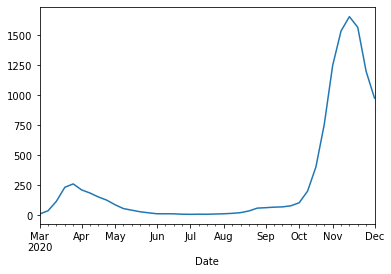

In [30]:
time_series.NewPositiveCases.resample('W').mean().plot()

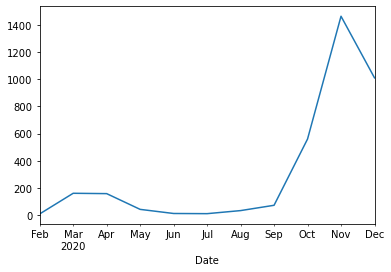

In [31]:
time_series.NewPositiveCases.resample('M').mean().plot()

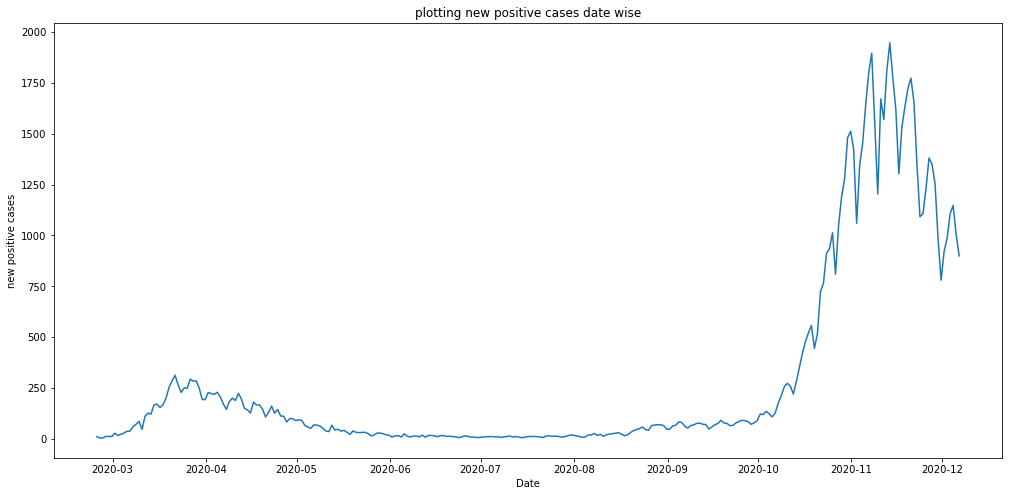

In [32]:
plt.figure(figsize=(17, 8))
plt.plot(time_series.NewPositiveCases)
plt.title('plotting new positive cases date wise')
plt.ylabel('new positive cases')
plt.xlabel('Date')
plt.grid(False)
plt.show()

In [33]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

In [34]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'green', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

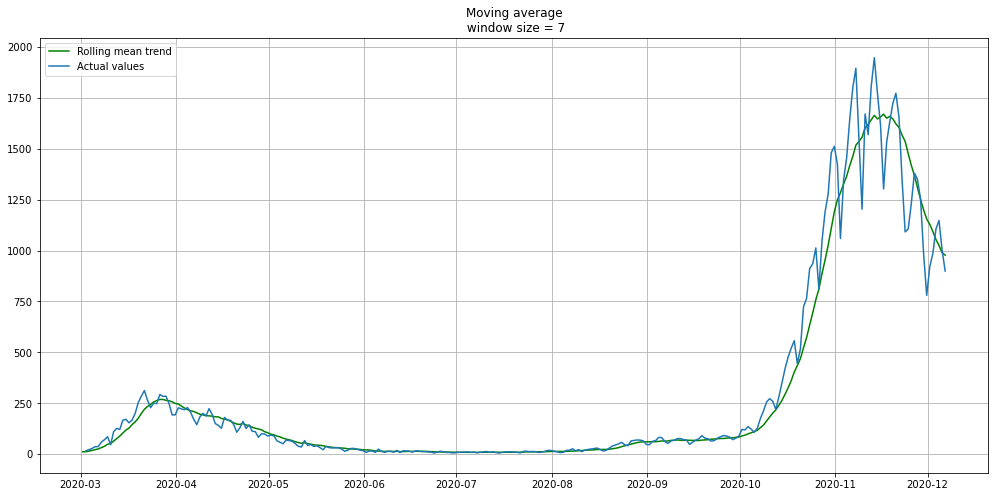

In [35]:
plot_moving_average(time_series.NewPositiveCases,7)

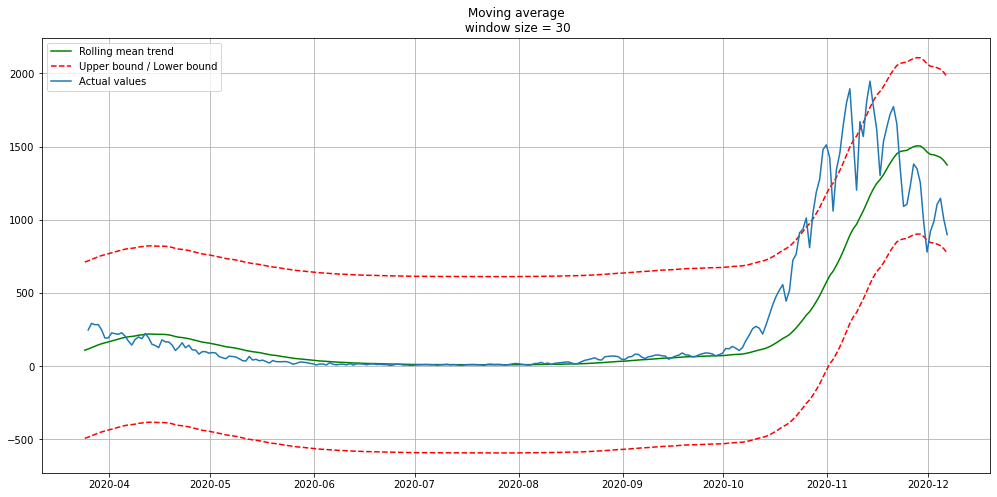

In [36]:
plot_moving_average(time_series.NewPositiveCases,30, plot_intervals=True)

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
test_result=adfuller(time_series['NewPositiveCases'])

In [39]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(cases):
    result=adfuller(cases)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [40]:
adfuller_test(time_series['NewPositiveCases'])

ADF Test Statistic : -0.2726668192271839
p-value : 0.9292873080341517
#Lags Used : 15
Number of Observations Used : 271
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [41]:
time_series['cases First Difference'] = time_series['NewPositiveCases'] - time_series['NewPositiveCases'].shift(1)

In [42]:
time_series

,NewPositiveCases,cases First Difference
Date,,
2020-02-24 18:00:00,10.523810,NaN
2020-02-25 18:00:00,4.428571,-6.095238
2020-02-26 18:00:00,3.714286,-0.714286
2020-02-27 18:00:00,11.904762,8.190476
2020-02-28 18:00:00,11.333333,-0.571429
...,...,...
2020-12-02 17:00:00,986.142857,64.714286
2020-12-03 17:00:00,1105.952381,119.809524
2020-12-04 17:00:00,1147.571429,41.619048


In [43]:
adfuller_test(time_series['cases First Difference'].dropna())

ADF Test Statistic : -4.107453661097148
p-value : 0.0009414105623748873
#Lags Used : 14
Number of Observations Used : 271
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [44]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [45]:
#Autocrrelation and partial auto correlation
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

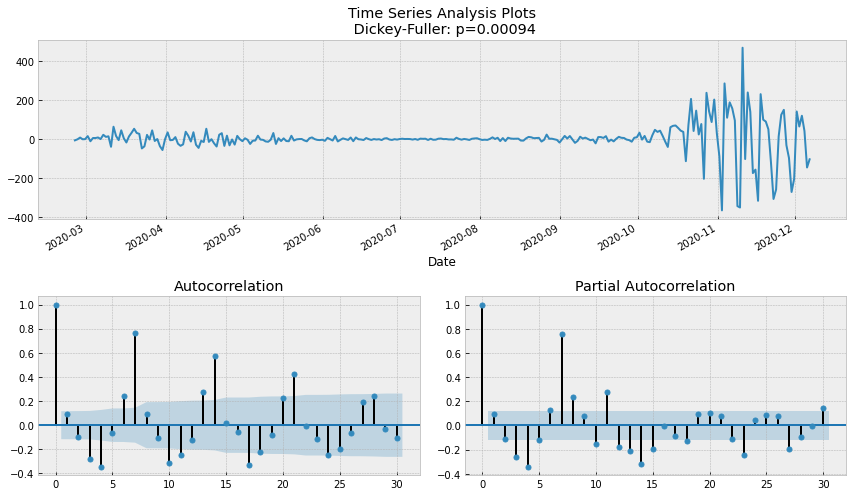

In [46]:
tsplot(time_series['cases First Difference'].dropna(), lags=30)

In [47]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=65.031581, expected=47.428571
predicted=48.486528, expected=46.571429
predicted=47.247151, expected=63.142857
predicted=62.546964, expected=66.523810
predicted=66.519963, expected=82.523810
predicted=82.530429, expected=80.666667
predicted=80.019756, expected=61.761905
predicted=61.750787, expected=52.761905
predicted=52.692185, expected=65.238095
predicted=65.643031, expected=68.285714
predicted=68.108138, expected=76.047619
predicted=76.383760, expected=76.952381
predicted=76.760097, expected=71.476190
predicted=71.443146, expected=69.428571
predicted=69.390407, expected=48.000000
predicted=47.394585, expected=58.523810
predicted=58.515744, expected=69.142857
predicted=68.991808, expected=75.476190
predicted=75.757066, expected=90.809524
predicted=91.083459, expected=78.000000
predicted=77.456943, expected=75.571429
predicted=75.865339, expected=64.285714
predicted=63.778726, expected=66.285714
predicted=66.672264, expected=78.095238
predicted=78.169309, expected=85.047619


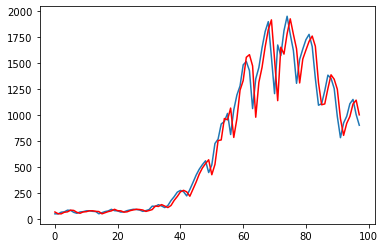

In [48]:
#arima modelling
# split into train and test sets
X = time_series['NewPositiveCases'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()